### Exploratory Data Analysis

Salah satu skill yang harus dimiliki oleh seorang data scientist adalah *Exploratory Data Analysis (EDA)*.

EDA dilakukan untuk memastikan integritas data yang diperoleh dan melakukan analisis. 

Kita akan melakukan EDA pada data ujian SAT dan ACT untuk membandingkan partisipasi dan performa di antara beberapa negara bagian (states) . 

SAT Exam adalah ujian masuk yang biasa dilakukan oleh institut dan universitas dalam proses penerimaan mahasiswa baru. SAT ujian pilihan ganda dilaksanakan pencil-and-paper test.

CAT Exam adalah ujian masuk institut dan universitas berbasis komputer.

#### Dataset
Kita akan menggunakan dataset SAT dan CAT 2017 dan 2018 yang sudah diupload di Google Drive

### Tujuan EDA
1. Secara cepat mendeskripsikan dataset, mengetahui jumlah baris dan kolom, data yang kosong, tipe data dan preview data
2. Membersihkan data yang *corrupt*, mengimputasi data yang kosong, mengatasi data yang tidak valid, atau nilai yang tidak wajar
3. Memvisualisasikan dsitribusi data, diagram batang, histogram dan boxplot
4. Melakukan kalkulasi dan visualisasi korelasi antar variabel.

In [82]:
# import sejumlah libraries yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Sebelum mengoding, usahakan setting working direktori
# dimana disana adalah tempat untuk menyimpan source code dan dataset
import os
# mengetahui working directori yang aktif

# mengubah working direktori yang aktif ke working direktori yang diinginkan
os.chdir('C:\\Users\\sitimariyah\\Documents\\Training OJK\\Training 20 Desember 2019\\Dataset')
print(os.getcwd())

C:\Users\sitimariyah\Documents\Training OJK\Training 20 Desember 2019\Dataset


In [85]:
# Membaca data, tuliskan nama file lengkap dengan extension file ".csv" atau ".txt", dll
sat_17 = pd.read_csv("sat_2017.csv")
sat_18 = pd.read_csv("sat_2018.csv")
act_17 = pd.read_csv("act_2017.csv")
act_18 = pd.read_csv("act_2018.csv")

#### Eksplorasi Data dan Membersihkan Data yang Corrupt

In [86]:
# Mengetahui dimensi data menggunakan fungsi .shape pada pandas
print("Dimensi SAT 2017 = ", sat_17.shape)
print("Dimensi SAT 2018 = ", sat_18.shape)
print("Dimensi ACT 2017 = ", act_17.shape)
print("Dimensi ACT 2018 = ", act_18.shape)

Dimensi SAT 2017 =  (51, 5)
Dimensi SAT 2018 =  (51, 5)
Dimensi ACT 2017 =  (52, 7)
Dimensi ACT 2018 =  (53, 3)


Dari data ini terlihat ketidak-konsistenan antara data ACT 2017 dan ACT 2018. Kita bisa lihat beberapa baris untuk mengetahui lebih detail

In [87]:
print("ACT 2017")
print(act_17.head(10),"\n") # \n berfungsi untuk ganti baris
print("ACT 2018")
print(act_18.head(10)) # tail untuk beberapa data terbawah

ACT 2017
                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2   

ACT 2018
           

In [88]:
print("SAT 2017")
print(sat_17.head(10),"\n") # \n berfungsi untuk ganti baris
print("SAT 2018")
print(sat_18.head(10)) # tail untuk beberapa data terbawah

SAT 2017
                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492

In [89]:
rata_rata_math = act_17['Math'].mean()  #rata2
rata_rata_english = act_17['English'].mean()
std_math = act_17['Math'].var()     #variance
std_english = act_17['English'].var()

In [90]:
print('Rata-rata Math: ', rata_rata_math)
print('Rata-rata Engslih: ', rata_rata_english)
print('Standar deviasi Math: ', std_math)
print('Nilai Maksimum Math: ', act_17['Math'].max())
print('Nilai Minimum Math: ', act_17['Math'].min())

Rata-rata Math:  21.173076923076923
Rata-rata Engslih:  20.91923076923077
Standar deviasi Math:  3.855731523378586
Nilai Maksimum Math:  25.3
Nilai Minimum Math:  18.0


In [91]:
act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Jika kita lihat data ACT 2017 dan ACT 2018 terdapat perbedaan jumlah baris sehingga ada indikasi terdapat duplikasi data pada ACT 2018. Duplikasi terhadap State yang mengisi data

In [92]:
# Gunakan .value_counts pada variabel State
act_18['State'].value_counts()

Maine               2
Maryland            1
Nevada              1
Arizona             1
Arkansas            1
North Carolina      1
Tennessee           1
Minnesota           1
North Dakota        1
Nebraska            1
Alaska              1
Kentucky            1
West Virginia       1
South Carolina      1
New Mexico          1
Connecticut         1
Michigan            1
New York            1
Idaho               1
Mississippi         1
Louisiana           1
Wisconsin           1
Texas               1
Iowa                1
Florida             1
Wyoming             1
Oklahoma            1
Vermont             1
Virginia            1
Delaware            1
Massachusetts       1
Hawaii              1
Alabama             1
Illinois            1
National            1
New Hampshire       1
Colorado            1
Ohio                1
New Jersey          1
Oregon              1
Utah                1
Georgia             1
Missouri            1
Rhode Island        1
South Dakota        1
Washington

In [93]:
act_18['State'].str.lower().value_counts()
#act_18['State'] = act_18['State'].str.lower()

maine               2
maryland            1
pennsylvania        1
north dakota        1
nevada              1
new mexico          1
georgia             1
colorado            1
minnesota           1
texas               1
ohio                1
rhode island        1
kentucky            1
arizona             1
south carolina      1
south dakota        1
washington, d.c.    1
alaska              1
new jersey          1
idaho               1
utah                1
california          1
connecticut         1
missouri            1
florida             1
hawaii              1
louisiana           1
virginia            1
wisconsin           1
west virginia       1
mississippi         1
washington          1
kansas              1
arkansas            1
wyoming             1
vermont             1
montana             1
nebraska            1
delaware            1
iowa                1
north carolina      1
oklahoma            1
tennessee           1
michigan            1
alabama             1
massachuse

Terlihat bahwa negara Maine tercatat dua kali, cek kembali ke data 

In [94]:
act_18[act_18['State'] == 'Maine']

,State,Participation,Composite
0,Maine,7%,24
52,Maine,7%,24


terbukti bahwa State Maine terdata dua kali, maka perbaiki dataframe
act_18 untuk menghapus salah satu baris Maine

In [95]:
# kita akan menghapus berdasarkan index data tersebut berada
act_18.drop(act_18.index[52], inplace=True) # inplace ditujukan agar perubahan terjadi pada dataframe
act_18 = act_18.reset_index(drop=True)
act_18.shape

(52, 3)

Untuk bisa membandingkan performa State antara nilai ACT dan nilai SAT pada tahun yang sama, maka dua dataframe tersebut harus mengandung State yang sama persis.

Disini dibutuhkan kreativitas Anda untuk mengecek apakah ada State yang tidak ada di salah satuh dataframe. Misal,di ACT ada State A yang tidak ada di SAT

In [96]:
# State yang ada di ACT 2017 tapi tidak ada di SAT 2017 atau ACT only
# dan sebaliknya
print("2017 ACT only")  # hanya computer test
print(act_17[~act_17['State'].isin(sat_17['State'])], "\n")
print("2017 SAT Only")  # hanya paper test
print(sat_17[~sat_17['State'].isin(act_17['State'])], "\n")

2017 ACT only
      State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0 

2017 SAT Only
Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: [] 



In [97]:
# State yang ada di ACT 2018 tapi tidak ada di SAT 2018 atau ACT only
# dan sebaliknya
print("2018 ACT only")
print(act_18[~act_18['State'].isin(sat_18['State'])], "\n")
print("2018 SAT Only")
print(sat_18[~sat_18['State'].isin(act_18['State'])], "\n")

2018 ACT only
               State Participation Composite
16  Washington, D.C.           32%      23.6
23          National           50%     #REF! 

2018 SAT Only
                  State Participation  Evidence-Based Reading and Writing  \
8  District of Columbia           92%                                 497   

   Math  Total  
8   480    977   



Sekarang kita tahu bahwa
1. Pada tahun 2017, state National hanya ada di ACT 2017
2. Pada tahun 2018, state Washington, D.C dan National hanya ada di ACT 
3. Pada tahun 2018, state District of Columbia hanya ada di SAT 2018

maka lakukan perbaikan dengan cara membuang state yang tidak ada di keduanya

In [98]:
act_17.drop(act_17.index[0], inplace=True)
act_17 = act_17.reset_index(drop=True)
act_17.shape

(51, 7)

In [99]:
act_18[act_18['State'] == 'National']

,State,Participation,Composite
23,National,50%,#REF!


In [100]:
act_18.drop(act_18.index[23], inplace=True)
act_18 = act_18.reset_index(drop=True)
act_18.shape

(51, 3)

Pada tahun 2018, state District of Columbia hanya ada di SAT 2018 atau tidak ada di ACT 2018. Di ACT 2018 adanya Washington, D.C. Kita mesti cek pada tahun 2017, bisa jadi dikarenakan penamaan yang tidak seragam

In [101]:
act_18[act_18['State']=="Washington, D.C."]

,State,Participation,Composite
16,"Washington, D.C.",32%,23.6


In [102]:
act_17[act_17['State']=="Washington, D.C."]

,State,Participation,English,Math,Reading,Science,Composite


In [103]:
sat_18[sat_18['State']=="District of Columbia"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,92%,497,480,977


kita punya cukup bukti bahwa ada state yang sama dituliskan dengan nama yang berbeda
Maka ganti nama State Washington, DC di 2018 dengan District of Columbia

In [104]:
act_18['State'].replace({'Washington, D.C.':'District of Columbia'}, inplace=True)

In [105]:
print(act_17[~act_17['State'].isin(sat_17['State'])])
print(sat_17[~sat_17['State'].isin(act_17['State'])])

print(act_18[~act_18['State'].isin(sat_18['State'])])
print(sat_18[~sat_18['State'].isin(act_18['State'])])

Empty DataFrame
Columns: [State, Participation, English, Math, Reading, Science, Composite]
Index: []
Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []
Empty DataFrame
Columns: [State, Participation, Composite]
Index: []
Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []


In [106]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [107]:
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [108]:
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
4,California,31%,22.5,22.7,23.1,22.2,22.8


In [109]:
act_18.head()

,State,Participation,Composite
0,Maine,7%,24
1,Rhode Island,15%,24.2
2,New Hampshire,16%,25.1
3,Delaware,17%,23.8
4,Pennsylvania,20%,23.5


In [110]:
print("SAT 2017 Tipe Data: ", sat_17.dtypes)
print("SAT 2018 Tipe Data: ", sat_18.dtypes)
print("ACT 2017 Tipe Data: ", act_17.dtypes)
print("ACT 2018 Tipe Data: ", act_18.dtypes)

SAT 2017 Tipe Data:  State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
SAT 2018 Tipe Data:  State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
ACT 2017 Tipe Data:  State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object
ACT 2018 Tipe Data:  State            object
Participation    object
Composite        object
dtype: object


In [111]:
# function untuk mengubah tipe data

# membuang % terlebih dahulu
def fix_percent(column):
    # parameter berupa nama kolom
    column = column.apply(lambda cells : cells.strip('%'))
    return column.apply(lambda cells : cells.replace('x',''))

def convert_to_float(exam_df):# untuk mengubah tipe data menjadi float pada semua kolom kecuali kolom State
    #paramater berupa data frame
    features = [col for col in exam_df.columns if col != 'State']
    exam_df[features] = exam_df[features].astype(float)
    return exam_df

In [112]:
act_17['Composite']

0      19.2
1      19.8
2      19.7
3      19.4
4      22.8
5      20.8
6      25.2
7      24.1
8      24.2
9      19.8
10     21.4
11     19.0
12     22.3
13     21.4
14     22.6
15     21.9
16     21.7
17     20.0
18     19.5
19     24.3
20     23.6
21     25.4
22     24.1
23     21.5
24     18.6
25     20.4
26     20.3
27     21.4
28     17.8
29     25.5
30     23.9
31     19.7
32     24.2
33     19.1
34     20.3
35     22.0
36     19.4
37     21.8
38     23.7
39     24.0
40     18.7
41     21.8
42     19.8
43     20.7
44     20.3
45     23.6
46     23.8
47     21.9
48     20.4
49     20.5
50    20.2x
Name: Composite, dtype: object

In [113]:
sat_17['Participation'] = fix_percent(sat_17['Participation'])
sat_18['Participation'] = fix_percent(sat_18['Participation'])
act_17['Participation'] = fix_percent(act_17['Participation'])
act_18['Participation'] = fix_percent(act_18['Participation'])
act_17['Composite'] = fix_percent(act_17['Composite'])

In [114]:
# ubah ke float dengan memanggil fungsi convert_to_float() yang sudah dibuat sebelumnya
act_17 = convert_to_float(act_17)
act_18 = convert_to_float(act_18)
sat_17 = convert_to_float(sat_17)
sat_18 = convert_to_float(sat_18)

In [119]:
print(sat_17.columns)
print(act_17.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite', 'State_alias'],
      dtype='object')


In [120]:
print(sat_18.columns)
print(act_18.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')


In [121]:
#drop variabel
sat_17.drop(columns=['Evidence-Based Reading and Writing','Math'], inplace=True)
act_17.drop(columns=['English', 'Math', 'Reading', 'Science'], inplace=True)
sat_18.drop(columns=['Evidence-Based Reading and Writing', 'Math'], inplace=True)
print("Variabel SAT 2017 =", sat_17.columns, "\n")
print("Variabel SAT 2018 =", sat_18.columns, "\n")
print("Variabel ACT 2017 =", act_17.columns, "\n")
print("Variabel ACT 2018 =", act_18.columns, "\n")

Variabel SAT 2017 = Index(['State', 'Participation', 'Total'], dtype='object') 

Variabel SAT 2018 = Index(['State', 'Participation', 'Total'], dtype='object') 

Variabel ACT 2017 = Index(['State', 'Participation', 'Composite', 'State_alias'], dtype='object') 

Variabel ACT 2018 = Index(['State', 'Participation', 'Composite'], dtype='object') 



In [122]:
print("SAT 2017 Missing Data: ", sat_17.isnull().sum())
print("SAT 2018 Missing Data: ", sat_18.isnull().sum())
print("ACT 2017 Missing Data: ", act_17.isnull().sum())
print("ACT 2018 Missing Data: ", act_18.isnull().sum())

SAT 2017 Missing Data:  State            0
Participation    0
Total            0
dtype: int64
SAT 2018 Missing Data:  State            0
Participation    0
Total            0
dtype: int64
ACT 2017 Missing Data:  State            0
Participation    0
Composite        0
State_alias      0
dtype: int64
ACT 2018 Missing Data:  State            0
Participation    0
Composite        0
dtype: int64


In [115]:
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


In [116]:
def alias(column):
    column = column.apply(lambda cells : cells[:4])
    return column

In [117]:
act_17['State_alias'] = alias(act_17['State'])
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite,State_alias
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alab
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,Alas
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,Ariz
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arka
4,California,31.0,22.5,22.7,23.1,22.2,22.8,Cali
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,Colo
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,Conn
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,Dela
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,Dist
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,Flor


In [ ]:
# Membuat line chart dari data act_17
# ambil kolomm untuk diplot
fig, ax = plt.subplots(figsize=(30,10))
x = act_17.loc[:,'State_alias']
y = act_17.loc[:,'English']
ax.bar(x, y)
# set title dan labels 
ax.set_title('ACT 2017') 
ax.set_xlabel('State') 
ax.set_ylabel('English')

In [ ]:
# Membuat line chart dari data act_17
# ambil kolomm untuk diplot
fig, ax = plt.subplots(figsize=(10,5))
x = ['English', 'Math', 'Reading', 'Science']
y = act_17.loc[0,['English', 'Math', 'Reading', 'Science']]
ax.bar(x, y)
# set title dan labels 
ax.set_title('ACT 2017') 
ax.set_xlabel('Subject') 
ax.set_ylabel('Score')

Tujuan analisis kita ingin membandingkan SAT dan ACT data, maka semakin mirip variabel yang dimiliki oleh masing-masing dataset maka semakin membantu.Maka dari itu, kita akan mempertahankan variabel-variabel yang ada di keduanya yaitu State, Participation, Total (SAT) dan Composite (ACT).

Jika tujuan kita ingin membandingkan antar tahun maka pertahankan sebanyak mungkin variabel. Misalkan kita membandingkan nilai Math pada SAT 2017 dengan SAT 2018


Mengecek Missing Value

Mengecek Tipe Data

Tidak ada missing value namun pada variabel Participation pada data ACT bertipe Object yang artinya dianggap sebagai String. Jika data diaggap String maka tidak bisa dilakukan kalkulasi.

In [24]:
sat_18.head()

,State,Participation,Total
0,Alabama,6%,1166
1,Alaska,43%,1106
2,Arizona,29%,1149
3,Arkansas,5%,1169
4,California,60%,1076


terbaca String karena menggunakan % seharusnya Composite dan Participation bertipe float

In [28]:
act_17.tail()

,State,Participation,Composite
45,Virginia,29.0,23.8
46,Washington,29.0,21.9
47,West Virginia,69.0,20.4
48,Wisconsin,100.0,20.5
49,Wyoming,100.0,20.2


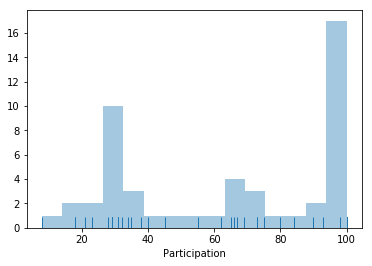

In [29]:
sns.distplot(act_17.loc[:,'Participation'], kde=False, rug=True, bins=15)